In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
seed=123

In [2]:
file_url = 'http://storage.googleapis.com/download.tensorflow.org/data/heart.csv'
df = pd.read_csv(file_url)


In [3]:
df.shape

(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.594059,0.676568,3.108911,131.785479,246.547855,0.148515,0.990099,149.194719,0.326733,1.057756,1.590759,0.683168,0.273927
std,9.016370,0.468560,1.028414,17.748338,52.175933,0.356198,0.988293,23.173368,0.469794,1.165025,0.617767,0.937773,0.446710
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [7]:
#Despite the fact that variables sex, cp,restecg,exang,fbs,thal and target are integar, the describtive information
# indicates they are categorical variables. Therefore, we should get original data describtion to categorigize them correctly.

df['sex']=df['sex'].apply(lambda x: 'Female' if x==0 else 'Male')
df['cp']=df['cp'].apply(lambda x:'Strong Angina' if x==0 else('Typical Angina' if x==1 else('Atypical Angina' if x==2 else('Non-anginal Pain' if x==3 else 'Asymptomatic'))))
df['slope']=df['slope'].apply(lambda x:'Normal' if x==1 else('fixed defect' if x==2 else 'reversible defect'))
df['restecg']=df['restecg'].apply(lambda x:'Normal' if x==0 else('ST-T Wave Abnormality' if x==1 else 'Left Ventricular Hypertrophy'))
df['exang']=df['exang'].apply(lambda x: 'No' if x==0 else 'Yes')
df['fbs']=df['fbs'].apply(lambda x:'Lower Than 120mg/ml' if x==0 else 'Greater Than 120mg/ml')
df['target']=df['target'].apply(lambda x:'Not Diagnosis of heart Disease' if x==0 else 'Diagnosis of heart Disease')
df['ca']=df['ca'].apply(lambda x:'ca1' if x==1 else('ca2' if x==2 else 'ca3'))



In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df_categorical = df[['sex','cp','slope','restecg','exang','fbs','thal','ca']]
df_numerical = df.drop(df_categorical.columns,axis=1)
df_numerical.drop('target',axis=1,inplace=True)

In [10]:
df_categorical.head()

,sex,cp,slope,restecg,exang,fbs,thal,ca
0,Male,Typical Angina,reversible defect,Left Ventricular Hypertrophy,No,Greater Than 120mg/ml,fixed,ca3
1,Male,Asymptomatic,fixed defect,Left Ventricular Hypertrophy,Yes,Lower Than 120mg/ml,normal,ca3
2,Male,Asymptomatic,fixed defect,Left Ventricular Hypertrophy,Yes,Lower Than 120mg/ml,reversible,ca2
3,Male,Non-anginal Pain,reversible defect,Normal,No,Lower Than 120mg/ml,normal,ca3
4,Female,Atypical Angina,Normal,Left Ventricular Hypertrophy,No,Lower Than 120mg/ml,normal,ca3


In [11]:
df_numerical.head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,67,160,286,108,1.5
2,67,120,229,129,2.6
3,37,130,250,187,3.5
4,41,130,204,172,1.4


In [12]:
y = pd.get_dummies(df['target'])

In [13]:
y.drop(['Not Diagnosis of heart Disease'],inplace=True,axis=1)


In [14]:
df_categorical = pd.get_dummies(df_categorical,drop_first=True)

In [15]:
df_categorical.head()

,sex_Male,cp_Atypical Angina,cp_Non-anginal Pain,cp_Strong Angina,cp_Typical Angina,slope_fixed defect,slope_reversible defect,restecg_Normal,restecg_ST-T Wave Abnormality,exang_Yes,fbs_Lower Than 120mg/ml,thal_2,thal_fixed,thal_normal,thal_reversible,ca_ca2,ca_ca3
0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1
1,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1
2,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0
3,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1
4,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1


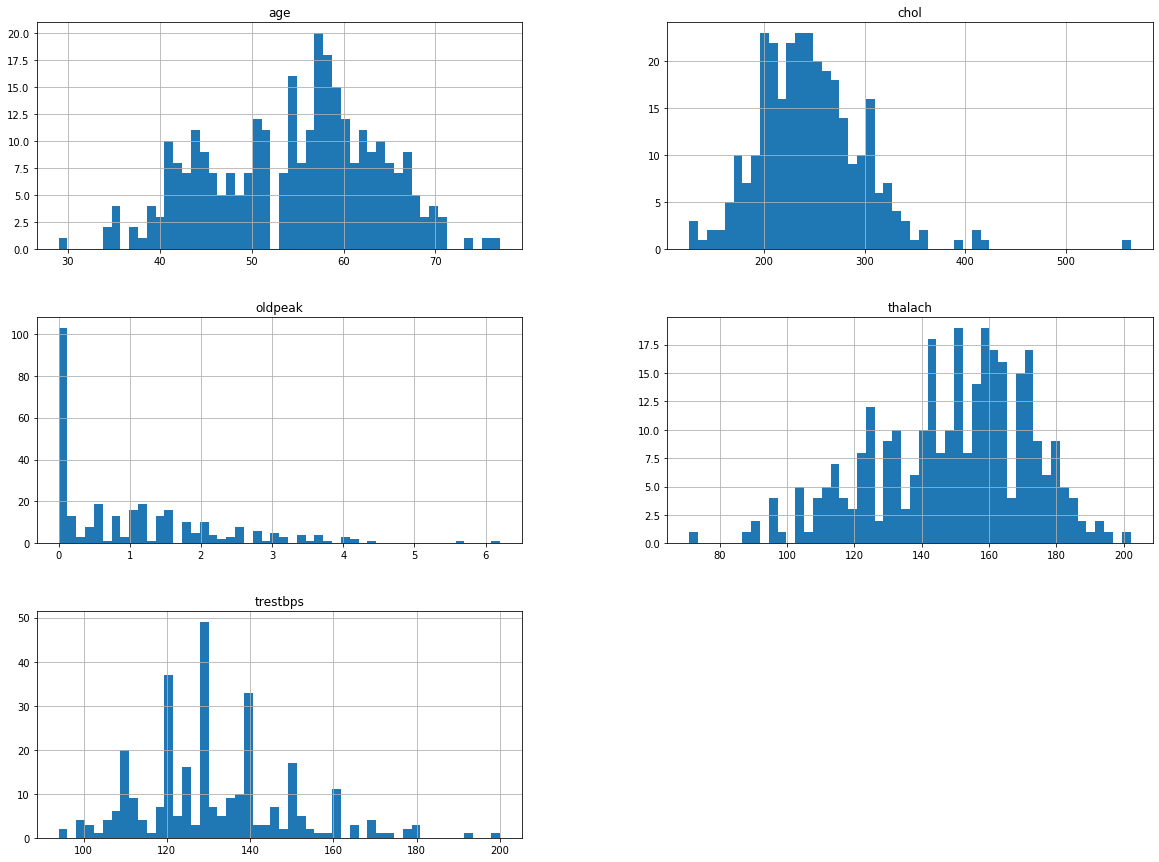

In [16]:
%matplotlib inline 
import matplotlib.pyplot as plt
df_numerical.hist(bins=50, figsize=(20,15))
plt.show()

In [17]:
corr_matrix = df_numerical.corr()
print(corr_matrix)

               age  trestbps      chol   thalach   oldpeak
age       1.000000  0.296902  0.187935 -0.388988  0.202158
trestbps  0.296902  1.000000  0.117326 -0.062518  0.190704
chol      0.187935  0.117326  1.000000  0.022511  0.031203
thalach  -0.388988 -0.062518  0.022511  1.000000 -0.340969
oldpeak   0.202158  0.190704  0.031203 -0.340969  1.000000


In [18]:
from sklearn.preprocessing import MinMaxScaler
# Define the scaler
scaler = MinMaxScaler().fit(df_numerical)

df_num = pd.DataFrame(scaler.transform(df_numerical))


In [19]:
df_num.columns=df_numerical.columns  

In [20]:
df_num.head()

,age,trestbps,chol,thalach,oldpeak
0,0.708333,0.481132,0.244292,0.603053,0.370968
1,0.791667,0.622642,0.365297,0.282443,0.241935
2,0.791667,0.245283,0.235160,0.442748,0.419355
3,0.166667,0.339623,0.283105,0.885496,0.564516
4,0.250000,0.339623,0.178082,0.770992,0.225806


In [21]:
X = pd.concat([df_categorical,df_numerical],axis=1)

In [22]:
X.isnull().sum()

sex_Male                         0
cp_Atypical Angina               0
cp_Non-anginal Pain              0
cp_Strong Angina                 0
cp_Typical Angina                0
slope_fixed defect               0
slope_reversible defect          0
restecg_Normal                   0
restecg_ST-T Wave Abnormality    0
exang_Yes                        0
fbs_Lower Than 120mg/ml          0
thal_2                           0
thal_fixed                       0
thal_normal                      0
thal_reversible                  0
ca_ca2                           0
ca_ca3                           0
age                              0
trestbps                         0
chol                             0
thalach                          0
oldpeak                          0
dtype: int64

In [23]:
X.shape

(303, 22)

In [24]:
percentage = float((y.isin([1]).sum()/len(y)))

print('The percentage of Diagnosis of Heart Disease :{:.2%}'.format(percentage))

The percentage of Diagnosis of Heart Disease :27.39%


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.05, random_state=seed)

In [26]:
input_dim = X_train.shape[1]

In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from imblearn.pipeline import Pipeline
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import BatchNormalization
from keras.layers import Dropout
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Activation, Dense

In [28]:
def make_keras_model(learning_rate=0.01,activation='relu',layer1_units=64, layer2_units=64,
                      layer3_units=64,dropout_rate=0.1, nbr_features=22 ,l2_regularization=0):
     
        # Describing optimization function
        opt = Adam(lr =learning_rate)  
        # Initialize the model
        model = Sequential()
        # Add input layer 
        model.add(Dense(layer1_units,input_shape=(nbr_features,),activation=activation))
        # Add Batchnormalization layer
        model.add(BatchNormalization())
        # Add first hidden layer
        model.add(Dense(layer2_units, activation = activation,kernel_regularizer=l2(l2_regularization)))
        # Add Batchnormalization layer
        model.add(BatchNormalization())
        # Add droupout layer
        model.add(Dropout(rate=dropout_rate))
        # Add Batchnormalization layer
        model.add(BatchNormalization())
        # Add second hidden layer
        model.add(Dense(layer3_units, activation = activation,kernel_regularizer=l2(l2_regularization)))
        # Add Batchnormalization layer
        model.add(BatchNormalization())
        # Add output layer
        model.add(Dense(1, activation = 'sigmoid'))
    
        # Compile your model with your optimizer, loss, and metrics
        model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
        return model

In [29]:

keras_estimator = KerasClassifier(make_keras_model,
                                  learning_rate=0.01,
                                   activation='relu',
                                 batch_size=32, 
                                 layer1_units=64,
                                 layer2_units=32,
                                 layer3_units=16,
                                 dropout_rate=0,
                                 l2_regularization=0,
                                 epochs=10, 
                                 verbose=False)



In [30]:
pipe = Pipeline([
        ('sampling', SMOTE()),
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler()),
        ('reduce_dim', PCA()),
        ('model', keras_estimator)
        
        ])



In [31]:
param_grid_keras ={
    'sampling': [SMOTE()],
    #'imputer__strategy': ['mean', 'median'],
    #'scaler': [MinMaxScaler(), StandardScaler()],
    #'reduce_dim__n_components':[5,7,11],
    'model__layer1_units': [64,128],
    'model__layer2_units': [32, 64],
    'model__layer3_units': [16, 32],
    'model__dropout_rate': [0, 0.2, 0.5],
    'model__epochs': [10,20,30,40, 60],
    'model__learning_rate':[0.01,0.1],
    
    'model__activation':['relu','softmax','tanh'],
    'model__batch_size':[32,64],
    
}



In [32]:

gridsearch_keras = GridSearchCV(pipe,
                                param_grid=param_grid_keras,
                                scoring='neg_mean_squared_error',
                                cv=2, 
                                refit=True,
                                verbose=True)




In [33]:
gridsearch_keras.fit(X_train,y_train)

Fitting 2 folds for each of 1440 candidates, totalling 2880 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


[Parallel(n_jobs=1)]: Done 2880 out of 2880 | elapsed: 255.9min finished


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('sampling', SMOTE()),
                                       ('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('reduce_dim', PCA()),
                                       ('model',
                                        <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000005782673C88>)]),
             param_grid={'model__activation': ['relu', 'softmax', 'tanh'],
                         'model__batch_size': [32, 64],
                         'model__dropout_rate': [0, 0.2, 0.5],
                         'model__epochs': [10, 20, 30, 40, 60],
                         'model__layer1_units': [64, 128],
                         'model__layer2_units': [32, 64],
                         'model__layer3_units': [16, 32],
                         'model__learning_rate': [0.01, 0.1],
                         'sampling': [

In [38]:
y_pred = gridsearch_keras.predict(X_test)

In [43]:
print(f'Best params: {gridsearch_keras.best_params_}')

Best params: {'model__activation': 'tanh', 'model__batch_size': 32, 'model__dropout_rate': 0.5, 'model__epochs': 20, 'model__layer1_units': 128, 'model__layer2_units': 32, 'model__layer3_units': 32, 'model__learning_rate': 0.01, 'sampling': SMOTE()}


In [37]:
print(f'Best score: {gridsearch_keras.best_score_}')

Best score: -0.15678418803418803


In [39]:
print(f'Test MSE: {mean_squared_error(y_true=y_test, y_pred=y_pred)}')

Test MSE: 0.125


In [40]:
print(f'Test MAE: {mean_absolute_error(y_true=y_test, y_pred=y_pred)}')

Test MAE: 31.875


In [52]:
gridsearch_keras.best_params_['model__learning_rate']

0.5

In [48]:

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X_res, y_res, test_size=0.05, random_state=seed)

In [57]:
nbr_features = X_train.shape[1]
print(nbr_features)

22


In [58]:
# Describing optimization function
opt = Adam(lr =gridsearch_keras.best_params_['model__learning_rate'])  
# Initialize the model
model = Sequential()
# Add input layer 
model.add(Dense(gridsearch_keras.best_params_['model__layer1_units'],input_shape=(nbr_features,),activation=gridsearch_keras.best_params_['model__activation']))
# Add Batchnormalization layer
model.add(BatchNormalization())
# Add first hidden layer
model.add(Dense(gridsearch_keras.best_params_['model__layer2_units'], activation = gridsearch_keras.best_params_['model__activation'],kernel_regularizer=l2(0)))
# Add Batchnormalization layer
model.add(BatchNormalization())
# Add droupout layer
model.add(Dropout(rate=gridsearch_keras.best_params_['model__dropout_rate']))
# Add Batchnormalization layer
model.add(BatchNormalization())
# Add second hidden layer
model.add(Dense(gridsearch_keras.best_params_['model__layer3_units'], activation = gridsearch_keras.best_params_['model__activation'],kernel_regularizer=l2(0)))
# Add Batchnormalization layer
model.add(BatchNormalization())
# Add output layer
model.add(Dense(1, activation = 'sigmoid'))
    
# Compile your model with your optimizer, loss, and metrics
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [59]:
model_hist = model.fit(X_train,y_train,epochs=gridsearch_keras.best_params_['model__epochs'],batch_size=gridsearch_keras.best_params_['model__batch_size'],
                      validation_data=(X_test, y_test))

Epoch 1/20
14/14 [==============================] - 2s 130ms/step - loss: 0.7888 - accuracy: 0.5670 - val_loss: 0.6836 - val_accuracy: 0.5909
Epoch 2/20
14/14 [==============================] - 0s 29ms/step - loss: 0.7200 - accuracy: 0.5742 - val_loss: 0.6792 - val_accuracy: 0.5909
Epoch 3/20
14/14 [==============================] - 0s 26ms/step - loss: 0.7210 - accuracy: 0.5933 - val_loss: 0.6747 - val_accuracy: 0.5909
Epoch 4/20
14/14 [==============================] - 0s 27ms/step - loss: 0.7015 - accuracy: 0.5550 - val_loss: 0.6789 - val_accuracy: 0.5909
Epoch 5/20
14/14 [==============================] - 0s 29ms/step - loss: 0.7312 - accuracy: 0.5239 - val_loss: 0.6743 - val_accuracy: 0.5909
Epoch 6/20
14/14 [==============================] - 0s 25ms/step - loss: 0.7337 - accuracy: 0.4928 - val_loss: 0.6769 - val_accuracy: 0.5909
Epoch 7/20
14/14 [==============================] - 0s 22ms/step - loss: 0.7009 - accuracy: 0.5359 - val_loss: 0.6777 - val_accuracy: 0.5909
Epoch 8/20
1

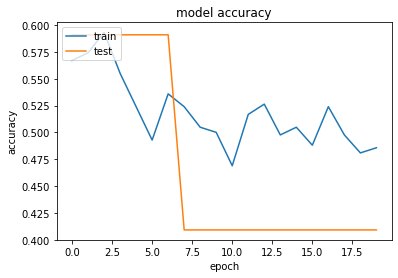

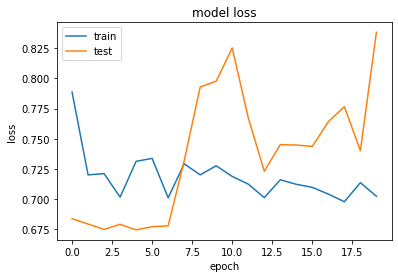

In [62]:
# summarize history for accuracy
plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()